# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
This is a classification problem because the goal here is to pick from one of finite (in this case 2) set of outcomes, based on a set of features. We only have 2 discrete outcomes - needs intervention or doesn't. Regression on the other hand is applied to problems that require continuous, numerical answers. In regression, there is a measure of distance between the different outcomes, so there is a degree of "wrongness" in answers (for e.g. when predicting the price of an item, if the right answer is 500, a prediction of 490 is a better answer than a 1000). In classification all wrong predictions are equally wrong (for e.g. a blue dress classified as yellow is as bad as one classified as red). In our problem, rather than have a spectrum, we assume a clear distinction between needs intervention, and not, which conclusively makes this a classification problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [62]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [63]:
# Explore dataset
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

print("\n--------------- Shape:\n")
print(student_data.shape)
print("\n\n\n\n--------------- Head:\n")
print student_data.head()
print("\n\n\n\n--------------- Describe:\n")
print(student_data.describe())
print("\n\n\n\n--------------- Groupby Passed:\n")
print(student_data.groupby('passed').size())


--------------- Shape:

(395, 31)




--------------- Head:

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   ...   internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...         no       no       4         3      4    1    1      3        6   
1  ...        yes       no       5         3      3    1    1      3        4   
2  ...        yes       no       4         3      2    2    3      3       10   
3  ...        yes      yes       3         2      2    1    1      5        2   
4  ...         no       no       4         3      2    1    2      5        

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [64]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]

# TODO: Calculate passing students
passed = student_data.groupby('passed').size()
n_passed = passed['yes']

# TODO: Calculate failing students
n_failed = passed['no']

# TODO: Calculate graduation rate
grad_rate = 100*passed['yes']/student_data.shape[0]

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.00%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [65]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [66]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Feature values:
   school_GP  school_MS  sex_F  sex_M  age  address_R  address_U  famsize_GT3  \
0          1          0      1      0   18          0          1            1   
1          1          0      1      0   17          0          1            1   
2          1          0      1      0   15          0          1

In [67]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [68]:
# TODO: Import any additional functionality you may need here
from sklearn import cross_validation

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X_all,y_all,test_size = num_test, random_state = 24)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

NB: 0.616667 (0.063683)
DT: 0.670000 (0.065744)
E-RF: 0.660000 (0.059255)
E-BC: 0.663333 (0.072188)
E-AB: 0.663333 (0.079512)
E-GB: 0.680000 (0.047610)
KNN: 0.693333 (0.053333)
SGDC: 0.646667 (0.070238)
SVM: 0.696667 (0.048189)
LR: 0.683333 (0.077817)


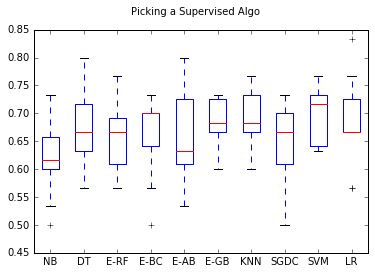

In [69]:
import pandas
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Supervised Algos To Test
models = []
scores = []
print_model = []


models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('E-RF', RandomForestClassifier()))
models.append(('E-BC', BaggingClassifier()))
models.append(('E-AB', AdaBoostClassifier()))
models.append(('E-GB', GradientBoostingClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGDC', SGDClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))

for toprint, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=24)
	cv = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	scores.append(cv)
	print_model.append(toprint)
	msg = "%s: %f (%f)" % (toprint, cv.mean(), cv.std())
	print(msg)
    

# Scores from running CV with 5, 10, 20, 25, 30 folds respectively
''' 5 fold
LR: 0.676667 (0.069602)
KNN: 0.680000 (0.016330)
SGDC: 0.590000 (0.150407)
CART: 0.626667 (0.048990)
NB: 0.636667 (0.028674)
E-RF: 0.633333 (0.039441)
E-BC: 0.663333 (0.045216)
E-AB: 0.673333 (0.024944)
E-GB: 0.680000 (0.048762)
SVM: 0.700000 (0.058689)
'''

''' 10 fold
LR: 0.683333 (0.077817) <--
KNN: 0.693333 (0.053333) <--
SGDC: 0.616667 (0.124052)
CART: 0.660000 (0.074237)
NB: 0.616667 (0.063683)
E-RF: 0.650000 (0.104616)
E-BC: 0.686667 (0.030551)
E-AB: 0.663333 (0.079512)
E-GB: 0.683333 (0.050000)
SVM: 0.696667 (0.048189) <--
'''

''' 20 fold
LR: 0.680000 (0.132665)
KNN: 0.693333 (0.112349)
SGDC: 0.603333 (0.193764)
CART: 0.663333 (0.154164)
NB: 0.626667 (0.137275)
E-RF: 0.660000 (0.133167)
E-BC: 0.670000 (0.130767)
E-AB: 0.663333 (0.151254)
E-GB: 0.676667 (0.121610)
SVM: 0.700000 (0.110554)
'''

''' 25 fold
LR: 0.686667 (0.147723)
KNN: 0.690000 (0.123648)
SGDC: 0.626667 (0.154776)
CART: 0.646667 (0.141970)
NB: 0.643333 (0.101434)
E-RF: 0.596667 (0.146591)
E-BC: 0.670000 (0.118977)
E-AB: 0.650000 (0.137437)
E-GB: 0.686667 (0.106145)
SVM: 0.693333 (0.132749)
'''

''' 30 fold
LR: 0.676667 (0.166700)
KNN: 0.696667 (0.125122)
SGDC: 0.570000 (0.188237)
CART: 0.640000 (0.147422)
NB: 0.633333 (0.122020)
E-RF: 0.613333 (0.160693)
E-BC: 0.666667 (0.127366)
E-AB: 0.673333 (0.150407)
E-GB: 0.680000 (0.124900)
SVM: 0.693333 (0.133998)
'''

# Plotting accuracy scores from our classifiers
fig = plt.figure()
fig.suptitle('Picking a Supervised Algo')
afig = fig.add_subplot(111)
plt.boxplot(scores)
afig.set_xticklabels(print_model)
plt.show()

**Answer: **
- **KNN**: KNN seems to score 2nd best at our preliminary test with an accuracy score of 0.693333. KNN is great because it is robust to noise in data, trains very fast, doesn't make assumptions about underlying data because it is non-parametric, and it can also detect both linear and non-linear boundaries. But KNN it also prone to overfitting, is sensitive to outliers, takes up a lot of space because it can't throw away data after learning a model, and is slow during querying. KNN is used in facial recognition, for e.g. by companies like Herta Security, which first generates feature vectors representations of people's faces using deep learning, then use KNN to compare these vectors to watch lists and thus identify people without needing to train classifiers for each person's face.
    
- **SVM**: SVM performed the best with an accuracy score of 0.696667. SVMs work great in domains with lots of features and complicated underlying structures (and in cases with dimensions > # of training samples). They are not affected by outliers, have theoretical bounds on overfitting, can produce non-linear classifications, and are memory efficient because they use only a subset of the datatset in their decision functions. But SVMs don't work for large datasets (which is okay because we have a small dataset) and in cases with a ton of noise (our dataset doesn't have much noise), and it can be hard to interpret the resulting models. It is also hard to choose the right kernel and parameters, tuning these parameters is very important in order to avoid overfitting, and takes up time (we can use GridSearch to overcome this). SVMs are used for predicting diseases like diabetes in patients (as seen https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/1472-6947-10-16), in detecing gender in images, spam filtering, display advertising etc.
    
- **Logistic Regression**: Logistic Regression was the 3rd best score above, performing at 0.683333. LR is great because it is fast to train and predict, it outputs probabilities, it is indifferent to noise in training data, doesn't need parameters to be tweaked, and doesn't make assumptions about the underlying dataset. But it only produces linear decision boundaries, is less accurate than newer methods, and its theta is hard to interpret. LR is used in spam classification, predicting product revenues, calculating credit scores, predicting if a person is depressed based on a bag of words, portfolio loss forecasting, customer retention (http://www.lexjansen.com/nesug/nesug98/solu/p095.pdf) etc.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [70]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [71]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
# from sklearn import model_B
# from sklearn import model_C

# TODO: Initialize the three models
clf_A = SVC()
clf_B = KNeighborsClassifier()
clf_C = LogisticRegression()
clf_D = BaggingClassifier()

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
print ("\n----------\n")
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
print ("\n----------\n")
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)

print ("\n\n----------------------------------\n\n")

train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
print ("\n----------\n")
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
print ("\n----------\n")
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)

print ("\n\n----------------------------------\n\n")

train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
print ("\n----------\n")
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
print ("\n----------\n")
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

print ("\n\n----------------------------------\n\n")

train_predict(clf_D, X_train_100, y_train_100, X_test, y_test)
print ("\n----------\n")
train_predict(clf_D, X_train_200, y_train_200, X_test, y_test)
print ("\n----------\n")
train_predict(clf_D, X_train_300, y_train_300, X_test, y_test)

Training a SVC using a training set size of 100. . .
Trained model in 0.0022 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.8263.
Made predictions in 0.0014 seconds.
F1 score for test set: 0.8199.

----------

Training a SVC using a training set size of 200. . .
Trained model in 0.0057 seconds
Made predictions in 0.0044 seconds.
F1 score for training set: 0.8515.
Made predictions in 0.0017 seconds.
F1 score for test set: 0.8188.

----------

Training a SVC using a training set size of 300. . .
Trained model in 0.0101 seconds
Made predictions in 0.0063 seconds.
F1 score for training set: 0.8559.
Made predictions in 0.0021 seconds.
F1 score for test set: 0.8108.


----------------------------------


Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0009 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.8344.
Made predictions in 0.0019 seconds.
F1 score for test set: 0.7619.

----------

Training a KN

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVM**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0024           |          0.0013              |      0.8263            |     0.8199            |
| 200               |        0.0081          |            0.0044            |        0.8515          |     0.8188            |
| 300               |          0.0129               |          0.0036              |       0.8559           |   0.8108      |

** Classifer 2 - KNN**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |          0.0010               |         0.0044               |         0.8344         |      0.7619           |
| 200               |        0.0012          |           0.0087             |          0.8481        |      0.8000           |
| 300               |             0.0016            |            0.0071            |          0.8591        |    0.7972      |

** Classifer 3 - Logistic Regression**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |            0.0021             |         0.0006               |         0.8966         |    0.7914             |
| 200               |             0.0058            |           0.0021             |        0.8498          |      0.7852           |
| 300               |              0.0075           |             0.0005           |         0.8353         |   0.8000              |


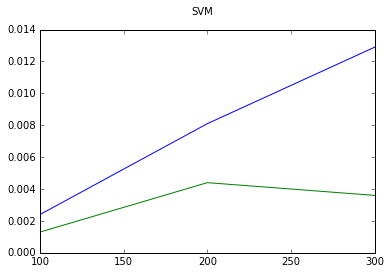

In [72]:
import matplotlib.pyplot as plt_svm
fig = plt.figure()
x = [100,200,300]
y_tr = [0.0024,0.0081,0.0129];
y_ts = [0.0013,0.0044,0.0036];
plt_svm.plot(x, y_tr)
plt_svm.plot(x, y_ts)
fig.suptitle('SVM')
plt_svm.show()

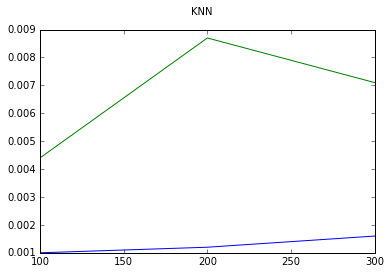

In [73]:
fig = plt.figure()
x = [100,200,300]
y_tr = [0.0010,0.0012,0.0016];
y_ts = [0.0044,0.0087,0.0071];
plt_knn.plot(x, y_tr)
plt_knn.plot(x, y_ts)
fig.suptitle('KNN')
plt_knn.show()

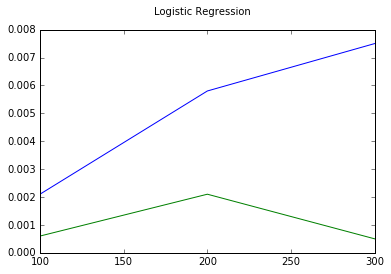

In [74]:
fig = plt.figure()
x = [100,200,300]
y_tr = [0.0021,0.0058,0.0075];
y_ts = [0.0006,0.0021,0.0005];
plt_lr.plot(x, y_tr)
plt_lr.plot(x, y_ts)
fig.suptitle('Logistic Regression')
plt_lr.show()

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
I chose to go with SVM as our classifier for this project. If we compare the training times above, we see the SVM takes the longest to train (but only by a few micro-seconds), and does betetr than KNN on test times and worse than logistic regression (but again only by a few micro-seconds). So far it doesn't sound like the best option out of the aforementioned 3.

But if we look at the f1 scores for training and testing, we see that even though both KNN and LR do better than SVM on the training data, they both do slightly worse than the SVM on our test data. This means that with both KNN and LR, there is a slight overfitting going on, whereas the SVM performs better on the test set than the training set, proving that it has learnt our dataset's underlying patterns without overfitting to these patterns.

Across the board on all 3 training set sizes, SVM has the best scores on our test data. And therefore, it seems to be a reasonably good choice for this problem!

Also, KNN and LR shine in datasets with noise, but our dataset doesn't have much noise, so their superpowers are wasted on our dataset. SVM on the other hand shines in cases with lots of features and not enough data, which is exactly the kind of dataset we have here (395 datapoints)!

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **
Imagine we have a training dataset consisting of labeled points that belong to one of two different classes - need intervention, and don't.

SVM essentially finds the line that best separates our dataset of students into these two classes, while committing the least to existing data. For e.g.

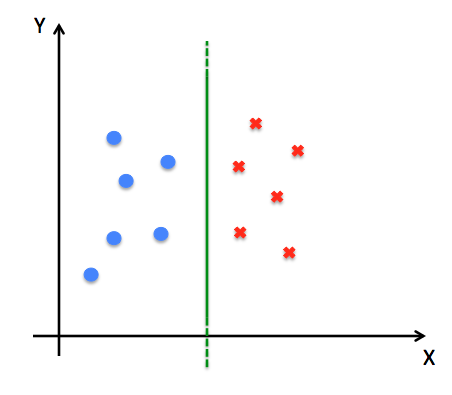

There can be many different lines that separate our data into the 2 classes, so to find the best fit line out of all possible lines that separate our data, SVM picks a line that is not too close to the training points because a line like this would be susceptible to fitting the noise in the data, and thus might not generalize. The SVM seeks to find a line as far from the points in our dataset as possible, and so it maximizes the "margin" (i.e. the distance) between the separating best-fit line and the nearest points of the dataset. By only choosing to be influenced by points near the best fit line (for some definition of "near"), the SVM ignores outliers, ensures robustness, and doesn't overfit.


<img src="img2.png">


The SVM works even if the data is spread across different shapes for e.g. in circular patterns.

<img src="img3.png">


In conclusion, SVM is great for cases with complicated domains and lots of functions, with a clear marginal separation, and it is quite resistant to overfitting. It's not so great with large datasets with tons of noise!

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [75]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

# TODO: Create the parameters list you wish to tune
# ", 'poly', 'sigmoid'"
kernel_values = ('linear', 'rbf')
C_range = (0.001, 0.01, 1, 10, 20, 50, 100, 200)
gamma_range = (1, 0.1, 0.01, 0.001, 0.0001)

# C_range = [1, 10]
# gamma_range = [0.1, 1]
parameters = dict(kernel=kernel_values,gamma=gamma_range, C=C_range)

print ("Initializing Classifier...")
# TODO: Initialize the classifier
clf = SVC()

print ("Making a Scorer...")
# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

print ("Performing GridSearch...")
# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, f1_scorer)

print ("Fitting...")
# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

print ("Getting Estimator...")
# Get the estimator
clf = grid_obj.best_estimator_

print "Best params: {}".format(grid_obj.best_params_)

print ("All Done!")
# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

'''
Getting Estimator...
Best params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
All Done!
Made predictions in 0.0069 seconds.
Tuned model has a training F1 score of 0.8170.
Made predictions in 0.0024 seconds.
Tuned model has a testing F1 score of 0.8553.
'''

Initializing Classifier...
Making a Scorer...
Performing GridSearch...
Fitting...
Getting Estimator...
Best params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
All Done!
Made predictions in 0.0056 seconds.
Tuned model has a training F1 score of 0.8170.
Made predictions in 0.0018 seconds.
Tuned model has a testing F1 score of 0.8553.


"\nGetting Estimator...\nBest params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}\nAll Done!\nMade predictions in 0.0069 seconds.\nTuned model has a training F1 score of 0.8170.\nMade predictions in 0.0024 seconds.\nTuned model has a testing F1 score of 0.8553.\n"

In [79]:
# ^ takes a little bit to fit

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

Tuned model has a training F1 score of 0.8170.

Tuned model has a testing F1 score of 0.8553.

This is great, we know out model is not overfitting (which is an advantage when using SVMs) and yet it is able to model our features and understand the underlying patterns in our data reasonably well!

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.